# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

<div class="alert alert-success">
<b>Overview:</b><br>
Data Exploration and Analysis consists of the following parts worth 70 points:
<ul>
    <li><b>E1 - Obtain and Scrub</b> (15 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(20 points)</li>
    <li><b>E3 - Formulate hypotheses </b>(25 points)</li>
    <li><b>Follow the guidelines for Data Exploration and Analysis below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Guidelines for Data Exploration and Analysis:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Export your environment for submission as 'prj01-environment.txt'.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook and required files to run the notebook. All cell outputs and <b>figures must display in jupyter lab</b>. (Test this, in particular when you use another environment like VS Code.)</li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the  guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>Avoid (excessive) code duplication.</li>
        <li>Avoid loops iterating over pandas objects (Series, DataFrames). Explicitly justify each exception via a comment. </li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

Explicitly list which notebook toolset was used (jupyter lab/jupyter notebook/VS Code/etc.) 

**here**: Jupyter Lab, Chrome

Explicitly and clearly state the chosen dataset number and title:
### Arbeitsmarkt ODÖ 
## 99. Gesamtübersicht über die Arbeitslosigkeit - Bestand, Zugang, Abgang


## E1 - Obtain and Scrub

### Obtain
Download the dataset and understand both: 
- format: wide vs. long, separaters, decimal points, encoding, etc., and 
- content: what variables are in the columns, what is their meaning?
To this end, identify and download metadata such as headers, category listings, explanatory reports, etc.
### Scrub
The aim of scrub is to create a clean version of the data for further analysis. 
- Load the dataset and take care of dtypes (dates, numbers, categories, etc.). Justify why you don't load/use specific columns.
- Check for footnotes or any other notifications on special cell content, such as time series breaks. Follow up that information, and document your decision how to deal with it. Remember: The homework 4 contained such info in the cell "76.1 b". The metadata defines what that "b" stands for.
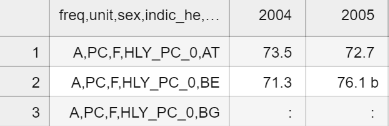
- Choose an appropriate (Multi-)Index.
- Identify:
    1. missing values and get row and column overviews. Use graphical and/or numeric approaches. Once identified, handle missing values according to column type, time series property and data set size.
    2. duplicates (justify the used column subset). Remove duplicates - if any - and inspect what you removed.
- Transform to shape (tidy vs. wide) best suited for further analysis.
- Export the clean data to a file for inspection with an external data browser (e.g., MS Excel).
- Provide an overview of the clean dataset:
    1. show the dtypes
    2. quantitative column descriptions: 
        1. categorical columns: number of unique values, counts 
        2. numeric columns: range and median

### Bevökerung ODÖ 
## 99. Hunde pro Bezirk Wien

This notebook was created using Jupyter Lab.

## Libraries

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtain and Scrub

In [2]:
# E1:

# load data
df=pd.read_csv('hunde-wien.csv', sep = ';',encoding= 'latin-1', header = 1, thousands='.')

# drop unnecessary columns
df.drop(['NUTS1','NUTS2','NUTS3','SUB_DISTRICT_CODE','Ref_Date'], axis=1, inplace=True)

# add column "inner_district"
def district(row):
    if row['Postal_CODE'] in (1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220,1230):
        return 0
    elif 1 <= row['Postal_CODE'] in (1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090):
        return 1
    else:
        return None 
df['inner_district'] = df.apply(district,axis=1)

# add column "mixed_breed"
def breed(row):
    if '/' in row['Dog Breed']:
        return 1
    else:
        return 0
df['mixed_breed'] = df.apply(breed,axis=1)

# clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

We used pandas *read_csv* to read our data into jupyter lab.The column separater is a semicolon and encoding is *latin-1* (also known as ISO-8859-1). It covers a limited set of characters, primarily from the Latin alphabet, digits, and some special characters. The first row in the file represents the header. The data is in a long format.

In the next step, we dropped the columns *NUTS1, NUTS2, NUTS3, SUB_DISTRICT_CODE* and *Ref_Date* which are not relevant for our analysis. 

- NUTS (Nomenclature of Territorial Units for Statistics) is a classification system used by the European Union for statistical and administrative purposes.*NUTS1, NUTS2, NUTS3* indicate the level in the hierarchy.In our case, every row has the same level of the hierachy in all three columns. Therefore, these columns do not provide any additional information for our data.
- The column *SUB_DISTRICT_CODE* contains "." in every row, thus can be dropped aswell. 
- *Ref_Date* is also the same for very row and shows when the data was last modified.

Afterward, we cleaned up the column names by formatting everything in lowercase and replacing spaces with underscores.

Following that, we added two extra columns *Inner district* and *mixed breed*.
Thus, our columns for the analysis are the following:

- **district_code**: The district code in Vienna is a numerical identifier assigned to each of the cities 23 districts
- **postal_code**: The postal code in Vienna is a numerical code assigned to specific geographic areas within the city.
- **dog_breed**: Specifies the breed of the dog.
- **anzahl**: Specifies the number of dogs 
- **inner_district**: Boolean column, which is 1, if the district is an inner district (1-9), and 0 otherwise.
- **mixed_breed**:  Boolean column, which is 1, if the breed is mixed, and 0 if it is purebred.

Our index is a simple numerical index, starting at 0.

### Check for missing values and duplicates

In [3]:
df.dtypes

district_code      int64
postal_code        int64
dog_breed         object
anzahl             int64
inner_district     int64
mixed_breed        int64
dtype: object

In [4]:
df['district_code'] = df['district_code'].astype('category')
df['postal_code'] = df['postal_code'].astype('category')
df['inner_district'] = df['inner_district'].astype('category')
df['mixed_breed'] = df['mixed_breed'].astype('category')
df['dog_breed'] = df['dog_breed'].astype('category')
df['anzahl'] = df['anzahl'].astype('int64')
df.dtypes

district_code     category
postal_code       category
dog_breed         category
anzahl               int64
inner_district    category
mixed_breed       category
dtype: object

After changing the data types, we have 5 categorial columns and one integer being 'anzahl'. 

In [5]:
df.isnull().sum()

district_code     0
postal_code       0
dog_breed         0
anzahl            0
inner_district    0
mixed_breed       0
dtype: int64

There are no missing values in our columns.

In [6]:
df.duplicated().sum()

0

Our data has no duplicates.

### Save cleaned data

In [7]:
df.to_csv('dogs_cleaned.csv', index=False)

### Quantitative column description

#### Categorial columns

In [8]:
categorical_columns = df.select_dtypes(include='category').columns

for column in categorical_columns:
    unique_values_count = df[column].nunique()
    value_counts = df[column].value_counts()
    
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {unique_values_count}")
    print("Value counts:")
    print(value_counts)


Column: district_code
Number of unique values: 23
Value counts:
district_code
92200    984
92100    888
91000    708
92300    683
90200    576
91400    536
90300    521
91100    520
91900    514
91200    481
91300    449
91600    443
91800    422
92000    388
91700    369
91500    351
90900    315
90500    298
90400    250
90700    235
90600    211
90800    198
90100    182
Name: count, dtype: int64

Column: postal_code
Number of unique values: 23
Value counts:
postal_code
1220    984
1210    888
1100    708
1230    683
1020    576
1140    536
1030    521
1110    520
1190    514
1120    481
1130    449
1160    443
1180    422
1200    388
1170    369
1150    351
1090    315
1050    298
1040    250
1070    235
1060    211
1080    198
1010    182
Name: count, dtype: int64

Column: dog_breed
Number of unique values: 3214
Value counts:
dog_breed
English Cocker Spaniel einfärbig                       23
Border Collie / Mischling                              23
Siberian Husky                

#### Numerical columns

In [9]:
range = df['anzahl'].max() - df['anzahl'].min()
print(f"Range of column 'anzahl': {range}")

Range of column 'anzahl': 1065


In [10]:
median = df['anzahl'].median()
print(f"Median of column 'anzahl': {median}")

Median of column 'anzahl': 1.0


## E2 - Exploratory data analysis (EDA)
Use the clean dataset and to understand and explore the relationships in the data (numerical, visual, statistical). This includes at least but is not limited to:
- A comprehensive textual description of meaning for relevant fields in the dataset
- Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.
- Checks for data quality, e. g., completeness, plausibility, outliers
- Handling any identified problems with the data
- If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the following steps of your analysis with appropriate data granularity and form ("tidy data")

Don't:
- test/prove hypotheses here. EDA should only motivate hypotheses. 

Advanced/bonus:
- Depending on your hypothesis you may want to join external data (e.g., merge external highest education level to existing vaccination data) for additional insights.

Explain all steps taken and your thinking why you deem them necessary.

In [11]:
df = pd.read_csv("dogs_cleaned.csv")
df.head()

,district_code,postal_code,dog_breed,anzahl,inner_district,mixed_breed
0,90100,1010,Akita / Belgischer Schäferhund,1,1,1
1,90100,1010,American Cocker Spaniel,2,1,0
2,90100,1010,American Cocker Spaniel / Pudel,1,1,1
3,90100,1010,American Staffordshire Terrier,1,1,0
4,90100,1010,Australian Shepherd,5,1,0


#### Groupy by inner/outer districts

In [12]:
# Group by 'dog_breed' and 'inner_outer', then sum the 'anzahl' for each group
result = df.groupby(['dog_breed', 'inner_district']).agg(summe_anzahl=('anzahl', 'sum')).reset_index()

# Sort the result by 'summe_anzahl' in descending order
result = result.sort_values(by='summe_anzahl', ascending=False)

In [13]:
result_inner = result[result['inner_district'] == 1]
result_inner.head(10)

,dog_breed,inner_district,summe_anzahl
3669,Unbekannt / Mischling,1,1104
2343,Labrador Retriever,1,380
3665,Unbekannt,1,348
807,Chihuahua Kurzhaar,1,316
2673,Malteser,1,286
1637,Französische Bulldogge,1,246
3800,Yorkshire Terrier,1,225
1675,Golden Retriever,1,211
2470,Labrador Retriever / Mischling,1,193
115,American Staffordshire Terrier,1,168


In [14]:
result_outer = result[result['inner_district'] == 0]
result_outer.head(10)

,dog_breed,inner_district,summe_anzahl
3668,Unbekannt / Mischling,0,5436
806,Chihuahua Kurzhaar,0,2200
2342,Labrador Retriever,0,1874
3664,Unbekannt,0,1870
2672,Malteser,0,1610
1636,Französische Bulldogge,0,1328
114,American Staffordshire Terrier,0,1216
1674,Golden Retriever,0,1082
3799,Yorkshire Terrier,0,1068
2469,Labrador Retriever / Mischling,0,1043


#### Group by district

/var/folders/nz/f22pg32j02lchrlshk_ycsrw0000gp/T/ipykernel_17679/882735992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x=dogs_per_district.index, y=dogs_per_district['anzahl'], palette=sns.color_palette("viridis"))
/var/folders/nz/f22pg32j02lchrlshk_ycsrw0000gp/T/ipykernel_17679/882735992.py:5: UserWarning: 
The palette list has fewer values (6) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax0 = sns.barplot(x=dogs_per_district.index, y=dogs_per_district['anzahl'], palette=sns.color_palette("viridis"))


Text(0, 0.5, 'Number of dogs')

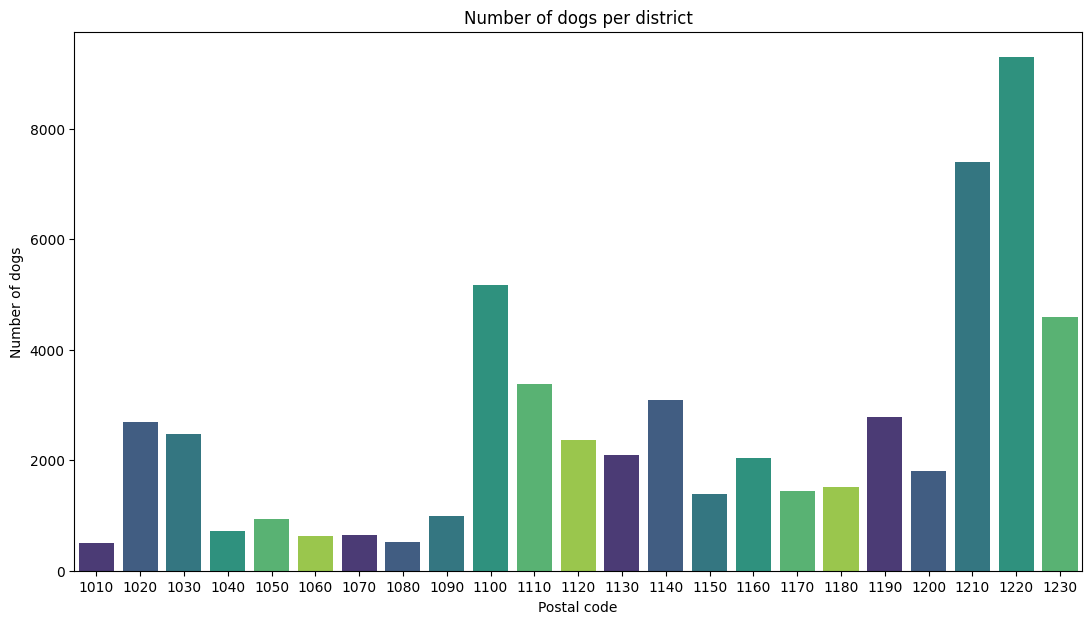

In [15]:
dogs_per_district = df.groupby('postal_code')['anzahl'].sum().reset_index().set_index('postal_code')

# Barplot
plt.figure(figsize=(12, 8))
ax0 = sns.barplot(x=dogs_per_district.index, y=dogs_per_district['anzahl'], palette=sns.color_palette("viridis"))
ax0.figure.set_size_inches(13, 7)

plt.title("Number of dogs per district")
plt.xlabel("Postal code")
plt.ylabel("Number of dogs")

#### Group by mixed/purebred

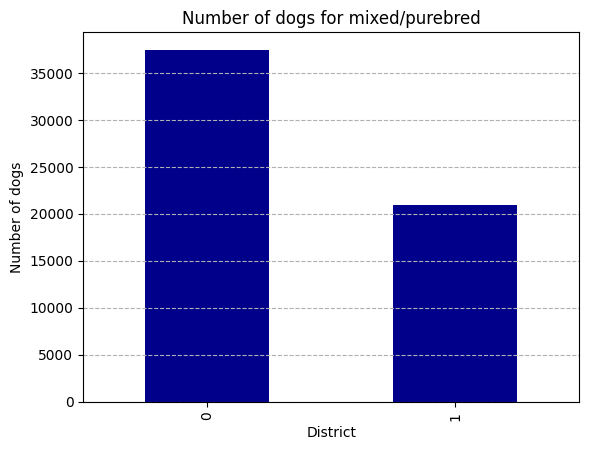

In [16]:
dogs_mixed = df.groupby('mixed_breed')['anzahl'].sum()

# Erstelle ein Barplot
ax = dogs_mixed.plot(kind='bar', color='darkblue')
plt.title('Number of dogs for mixed/purebred')
plt.xlabel('District')
plt.ylabel('Number of dogs')
ax.yaxis.grid(linestyle='dashed')

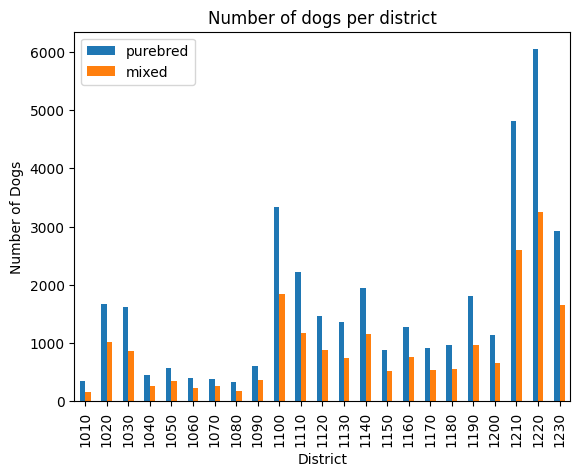

In [17]:
# Create a grouped bar chart
fig, ax = plt.subplots()

# Group the DataFrame by 'postal_code' and 'mixed_breed' and sum the 'anzahl'
grouped_data = df.groupby(['postal_code', 'mixed_breed'])['anzahl'].sum().unstack()

# Plot the grouped data
grouped_data.plot(kind='bar', ax=ax)

plt.title('Number of dogs per district')
plt.xlabel('District')
plt.ylabel('Number of Dogs')

plt.legend(title='', labels=['purebred', 'mixed']);

## E3 - Formulate hypotheses

*Note: Read this section entirely and understand it - every group member.*

A hypothesis is an idea or explanation for something that is based on known facts but has not yet been proved. A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on facts (the data). https://gradcoach.com/what-is-a-research-hypothesis-or-scientific-hypothesis/

Formulate 5 non-trivial hypotheses, 1 per group member, and regard the following criteria: 
- State the hypothesis explicitly in concise language. 
- The hypothesis must be **motivated** by either **EDA results** or **literature** (citation in the report needed).
- The hypothesis must refer to **endpoints** that are **testable**. Specifically, the endpoint must be derived from the data.
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.
- If you decide to use a statistical test, use it properly. In particular, check the validity and comparability of the samples.

Do not:
- State nebulous, vague hypotheses. These don't contain endpoints and are unclear to test (i.e., answer).
- Use post-hoc hypotheses. Portraying an empirically inspired **post hoc hypothesis as a priori** violates the **falsification principle** crucial for hypothesis-driven (that is, confirmatory) empirical research. Falsification is severe scientific fraud.
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".
- Try to **produce positively tested hypotheses**. If a well motivated hypothesis is negative, this is an important finding (see Simpson's Paradox). The value of a tested hypothesis lies in the information or learning it provides.

Example: The homework with Simpson's Paradox. The pooled overall comparison between the genders would be the EDA motivating the hypothesis: "At UC Berkeley the by-department admissions rate for females is lower than for males." It should be tested using samples of department admission rates for the 2 **groups** male and female. No steps of the test should be done in EDA (or a priory to stating the hypothesis). The groups should be compared graphically, e.g., via a stripplot overlayed with a boxplot. The figure should be labelled properly and exported for the report. A (paired) t-test *may* be used to test this hypothesis statistically. For different data (e.g., time series) different approaches may be required.


### E3-H1: "xxx"
Author: Group member 1


### E3-H2: "In outer districts the proportion of mixed-breed dogs is higher compared to purebred dogs."
Author: Kathrin Schumich



#### Grouped by inner/outer districts

In [18]:
contingency_table = pd.crosstab(df['inner_district'], df['mixed_breed'], margins=True, margins_name='Total')
contingency_table

mixed_breed,0,1,Total
inner_district,,,
0,2726,5010,7736
1,1263,1523,2786
Total,3989,6533,10522


Text(0.5, 1.0, 'Normalized Cross-Tabulation')

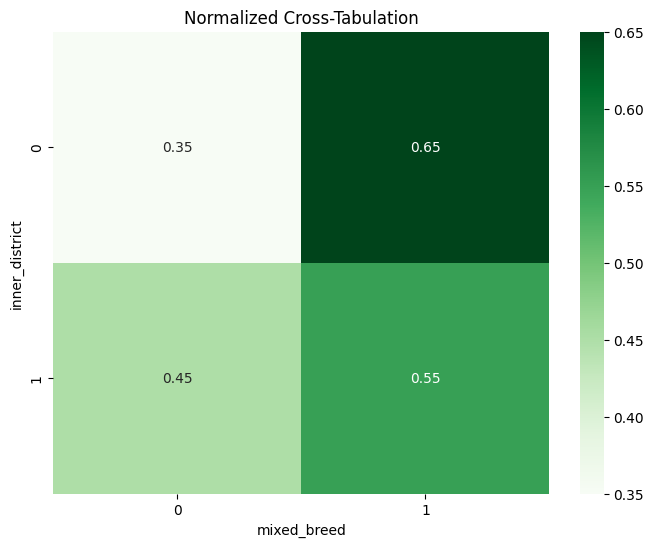

In [19]:
contingency_table2 = pd.crosstab(df['inner_district'], df['mixed_breed'], normalize='index').round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table2, annot=True, cmap='Greens', cbar=True, fmt=".2f")
plt.title('Normalized Cross-Tabulation')

#### Grouped by district

In [20]:
contingency_table3 = pd.crosstab(df['postal_code'], df['mixed_breed'], margins=True, margins_name='Total')
contingency_table3

mixed_breed,0,1,Total
postal_code,,,
1010,101,81,182
1020,214,362,576
1030,203,318,521
1040,124,126,250
1050,133,165,298
1060,112,99,211
1070,121,114,235
1080,115,83,198
1090,140,175,315


Text(0.5, 1.0, 'Normalized Cross-Tabulation')

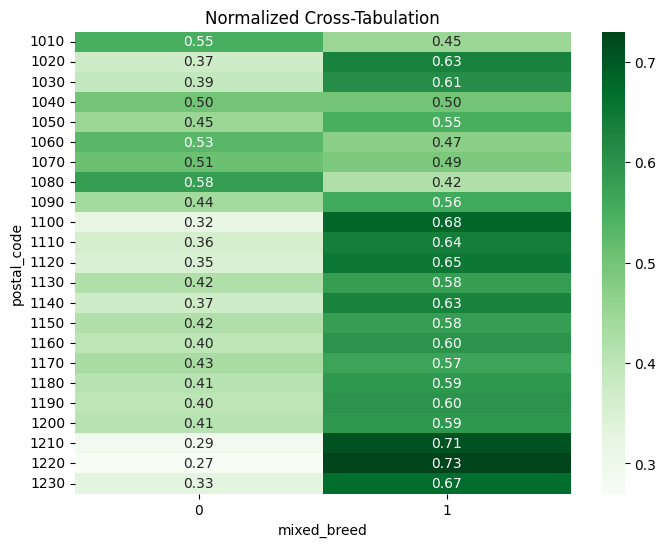

In [21]:
contingency_table4 = pd.crosstab(df['postal_code'], df['mixed_breed'], normalize='index').round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table4, annot=True, cmap='Greens', cbar=True, fmt=".2f")
plt.title('Normalized Cross-Tabulation')

#### Results

The result of the analysis indicates that there are indeed more mixed dogs (proportionally) in outer districts than purebred dogs. This can be seen in the first part, where we looked at the proportion, grouped only by inner/outer districts. 65% of the dogs in the outer districts are mixed, while only 35% are purebred. The same conclusion is obtained in the second part, where we looked at the proportions for each district individually. In every district, which is classified as "outer district" (districts 10-23), the proportion for mixed dogs is higher that the proportion for purebred dogs. 

Furthermore, it can be observed that the respective proportions in the inner districts, in contrast to the outer districts, do not differ as significantly. Therefore, it cannot be stated that there are more purebred or mixed-breed dogs in the inner districts."

Finally, it can be concluded that the results support the hypothesis "In outer districts the proportion of mixed-breed dogs is higher compared to purebred dogs" and, therefore, it cannot be rejected.

### E3-H3: "xxx"
Author: Group member 3


### E3-H4: "xxx"
Author: Group member 4


### E3-H5: "xxx"
Author: Group member 5


# BEGIN DATA CLEANING H5

In [22]:
## read in external data for hypothesis 5

In [23]:
parks = pd.read_csv("PARKINFOOGD.csv")
parks.shape

(1028, 13)

In [24]:
parks.dtypes

FID                  object
OBJECTID              int64
SHAPE                object
ANL_NAME             object
BEZIRK                int64
FLAECHE              object
OEFF_ZEITEN          object
SPIELEN_IM_PARK      object
WASSER_IM_PARK       object
HUNDE_IM_PARK        object
TELEFON              object
WEBLINK1             object
SE_ANNO_CAD_DATA    float64
dtype: object

The main variables of interest to enrich our data set are the sizes of parks, and if dogs are allowed to enter. To be able to join, we also need the district numbers. For first inspection, we also keep the names of the parks.

In [25]:
# drop unnecessary columns
parks=parks.drop(["SHAPE","FID", "OBJECTID", "OEFF_ZEITEN", "SPIELEN_IM_PARK", "TELEFON", "WEBLINK1", "SE_ANNO_CAD_DATA", "WASSER_IM_PARK"], axis=1)


In [26]:
parks.head()

,ANL_NAME,BEZIRK,FLAECHE,HUNDE_IM_PARK
0,Ruth-Maier-Park,2,2.488 m²,Nein
1,Vilma-Steindling-Promenade,2,4.346 m²,Nein
2,GA Am-Ostrom-Park,22,725 m²,Nein
3,PA Max-Patat-Weg,19,2.416 m²,Nein
4,Luise-Montag-Park,11,13.660 m²,Ja


In [27]:
parks.isna().sum()

ANL_NAME         0
BEZIRK           0
FLAECHE          0
HUNDE_IM_PARK    0
dtype: int64

In [28]:
parks.duplicated().sum()

0

We need to reformat BEZIRK for joining on postal code, and clean and cast the area values (FLAECHE): 

In [29]:
# change Bezirk to 4 digit code
parks['BEZIRK'] = (100 + parks['BEZIRK'])*10
# cast FLÄCHE to integer
parks['Gruenflaeche_m2'] = parks['FLAECHE'].str.replace('.', '').replace('[^\d.]', '', regex=True).astype(int)

We only want to consider parks, where dogs are allowed: 

In [30]:
#parks=parks[parks["HUNDE_IM_PARK"] == "Ja"].copy() -> resulted in losing districts 7 and 8 as there are no values matching this condition
parks.loc[parks["HUNDE_IM_PARK"] == "Nein", "Gruenflaeche_m2" ] = 0 # set to zero instead

In [31]:
parks.head()

,ANL_NAME,BEZIRK,FLAECHE,HUNDE_IM_PARK,Gruenflaeche_m2
0,Ruth-Maier-Park,1020,2.488 m²,Nein,0
1,Vilma-Steindling-Promenade,1020,4.346 m²,Nein,0
2,GA Am-Ostrom-Park,1220,725 m²,Nein,0
3,PA Max-Patat-Weg,1190,2.416 m²,Nein,0
4,Luise-Montag-Park,1110,13.660 m²,Ja,13660


We can then calculate the totals per district: 

In [32]:
parks=parks.groupby(["BEZIRK"], as_index=False).sum("FLAECHE_m2") 

In [33]:
parks.isna().sum()

BEZIRK             0
Gruenflaeche_m2    0
dtype: int64

In [34]:
parks.duplicated().sum()

0

In [35]:
parks.columns=["postal_code", "green_space(sqm)"]

In [36]:
parks.to_csv("parks_cleaned.csv", index=False)

To make districts of different sizes comparable, we calculate the proportion of green areas, where dogs are allowed, in relation to total district size. We use another data set provided by the city of Vienna: 

In [37]:
districts=pd.read_csv("vie-bez-biz-pop-den-2002f.csv", header=1, sep=";", decimal=",", thousands=".", 
                   ### set usecols to avoid empty columns for this data set
                   usecols=['NUTS', 'DISTRICT_CODE', 'SUB_DISTRICT_CODE', 'REF_YEAR', 'REF_DATE','POP_VALUE', 'AREA', 'POP_DENSITY'])
districts.head()


,NUTS,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,POP_VALUE,AREA,POP_DENSITY
0,AT13,90000,90000,2002,20020101,1571123,414.87,3787.02
1,AT13,90000,90000,2003,20030101,1592846,414.87,3839.38
2,AT13,90000,90000,2004,20040101,1610410,414.87,3881.71
3,AT13,90000,90000,2005,20050101,1632569,414.87,3935.12
4,AT13,90000,90000,2006,20060101,1652449,414.87,3983.04


We only want to keep the latest values, where the reference year (REF_YEAR) is 2023, additional variables of interest are the aforementioned district area(AREA) and the number of inhabitants per district (POP_VALUE), which will allow us to calculate the number of dogs per inhabitant. We cannot join parks with area directly, because we don't have the district numbers in this data set, but we can use DISTRICT_CODE to join with our main data set. 

In [38]:
districts=districts[districts["REF_YEAR"]==2023]
districts=districts[["DISTRICT_CODE", "AREA", "POP_VALUE"]].reset_index(drop=True)

In [39]:
districts.head()

,DISTRICT_CODE,AREA,POP_VALUE
0,90000,414.87,1982097
1,90100,2.87,16620
2,90200,19.24,108269
3,90300,7.40,96756
4,90400,1.78,33633


In [40]:
districts.dtypes

DISTRICT_CODE      int64
AREA             float64
POP_VALUE          int64
dtype: object

To align with the park dataset, the area provided in square kilometers is converted to square meters.

In [41]:
districts["AREA"]=(districts["AREA"]*1e+6).astype(int)
districts.head()

,DISTRICT_CODE,AREA,POP_VALUE
0,90000,414870000,1982097
1,90100,2870000,16620
2,90200,19240000,108269
3,90300,7400000,96756
4,90400,1780000,33633


In [42]:
districts.columns=districts.columns.str.lower()

In [43]:
districts.to_csv("districts_cleaned.csv", index=False)

# END DATA CLEANING H5

# BEGIN EDA H5

In [44]:
dogs_per_district=pd.read_csv("dogs_cleaned.csv")
parks=pd.read_csv("parks_cleaned.csv")
districts=pd.read_csv("districts_cleaned.csv")

To begin exploring the data, we need to calculate the amount of dogs, then join the additional data sets: 

In [45]:
dogs_per_district = dogs_per_district.groupby(['postal_code', 'district_code'])['anzahl'].sum().reset_index()
dogs_per_district.head()

,postal_code,district_code,anzahl
0,1010,90100,508
1,1020,90200,2696
2,1030,90300,2483
3,1040,90400,715
4,1050,90500,928


In [46]:
# First join on parks with postal codes: 
df_h5 = pd.merge(dogs_per_district, parks, on="postal_code")
df_h5.head()

,postal_code,district_code,anzahl,green_space(sqm)
0,1010,90100,508,2646
1,1020,90200,2696,550314
2,1030,90300,2483,167372
3,1040,90400,715,41528
4,1050,90500,928,34577


In [47]:
# Second join on districts with district codes: 
df_h5 = pd.merge(df_h5, districts, on="district_code")

In [48]:
df_h5.dtypes

postal_code         int64
district_code       int64
anzahl              int64
green_space(sqm)    int64
area                int64
pop_value           int64
dtype: object

We have valid data for all 23 districts. 

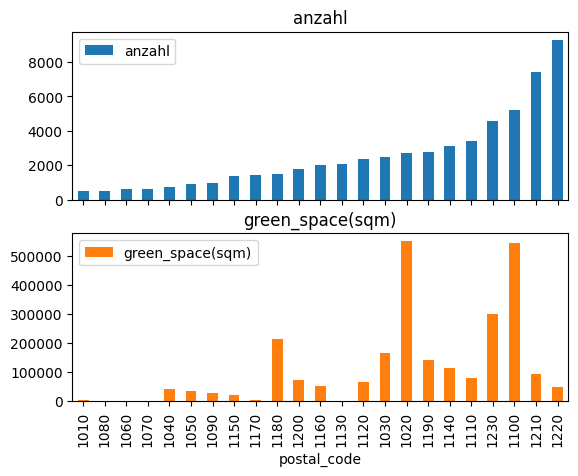

In [49]:
df_h5.sort_values("anzahl").plot(x="postal_code", y=["anzahl","green_space(sqm)"], kind="bar", subplots=True);

A quick visual exploration of the data shows, that there might be a relationship between available greenspace for dogs and the amount of dogs owned: The districts on the left have no or very litte greenspace and also lesser numbers of dog owners. 

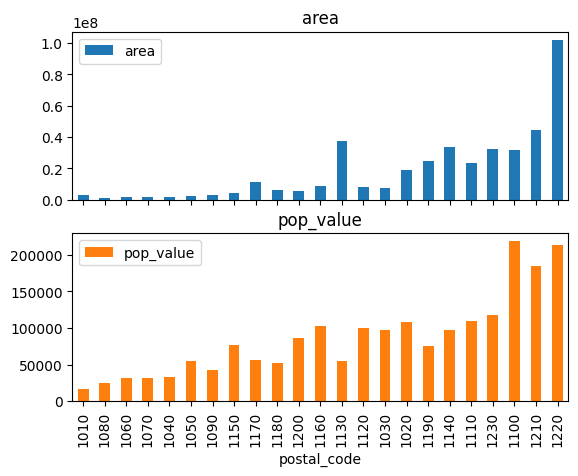

In [50]:
df_h5.sort_values("anzahl").plot(x="postal_code", y=["area","pop_value"], kind="bar", subplots=True);

When we look at the demographics, these districts are smaller as well and also have less population. This should be accounted for, when looking for correlations.  

Based on these findings we can examine hypothesis H5 in section 3: "Districts with a higher proportion of green space for dogs have more dogs per inhabitant than districts with less green space."

# END EDA H5

# BEGIN FORMULATE HYPOTHESIS H5

### E3-H5: "Districts with a higher proportion of green space for dogs have more dogs per inhabitant than districts with less green space."
Author: Michaela Hubweber 

Data Sources: 
* Parkanlagen Standorte Wien, Magistrat Wien - Magistratsabteilung 42 - Wiener Stadtgärten <br> https://www.data.gv.at/katalog/dataset/22add642-d849-48ff-9913-8c7ba2d99b46#additional-info <br> Used File version: PARKINFOOGD.csv (Downloaded: 02.01.2024)
* Bevölkerungsdichte seit 2002 - Bezirke Wien, Magistrat Wien - Magistratsabteilung 23 - Wirtschaft, Arbeit und Statistik <br> https://www.data.gv.at/katalog/dataset/dc56ea9e-57be-47d5-ab50-d1e74fda7118 <br> Used File version: vie-bez-biz-pop-den-2002f.csv (Downloaded: 02.01.2024)

Related Literature: 
* Purtscher, Mag Clemens. "Tiergerechte Hundehaltung und Auslaufmöglichkeiten in Wien." Kapitel 8, pp.40, Online: https://sloughi.blogger.de/static/antville/sloughi/files/hundestudie.pdf (Accessed: 02.01.2024)

To validate our hypothesis we first calculate some ratios, dogs per capita and greenspace per total area (in percent)

In [59]:
# Calculate ratios: 
df_h5["dogs_per_capita"]=df_h5["anzahl"]/df_h5["pop_value"]
df_h5["greenspace_pct"]=df_h5["green_space(sqm)"]/df_h5["area"]*100
df_h5

,postal_code,district_code,anzahl,green_space(sqm),area,pop_value,dogs_per_capita,greenspace_pct
0,1010,90100,508,2646,2870000,16620,0.030566,0.092195
1,1020,90200,2696,550314,19240000,108269,0.024901,2.860260
2,1030,90300,2483,167372,7400000,96756,0.025662,2.261784
3,1040,90400,715,41528,1780000,33633,0.021259,2.333034
4,1050,90500,928,34577,2009999,55018,0.016867,1.720250
5,1060,90600,626,992,1460000,31423,0.019922,0.067945
6,1070,90700,644,0,1610000,31581,0.020392,0.000000
7,1080,90800,519,0,1090000,24674,0.021034,0.000000
8,1090,90900,983,27194,2970000,42206,0.023291,0.915623
9,1100,91000,5178,545566,31830000,218415,0.023707,1.713999


Another quick data exploration already indicates, that the hypothesis might not hold: When sorting by dogs/capita, we see that many districts with medium high dog population have a lot of green space. The distribution for area is more, what we would expect to see, if there was a positive correlation. 

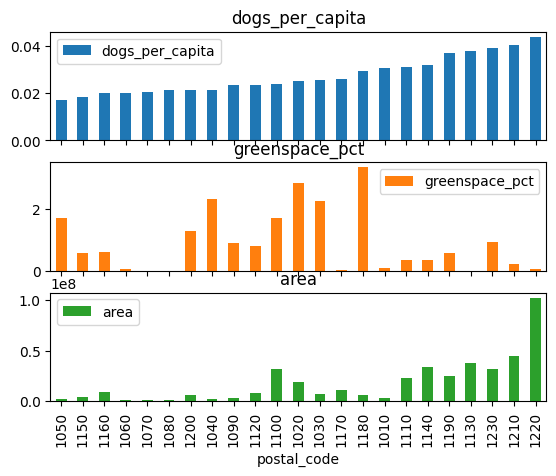

In [67]:
df_h5.sort_values("dogs_per_capita").plot(x="postal_code", y=["dogs_per_capita","greenspace_pct", "area"], kind="bar", subplots=True);

We can then plot the data with a linear regression model fit to get a visual impression, if the hypothesis holds. 

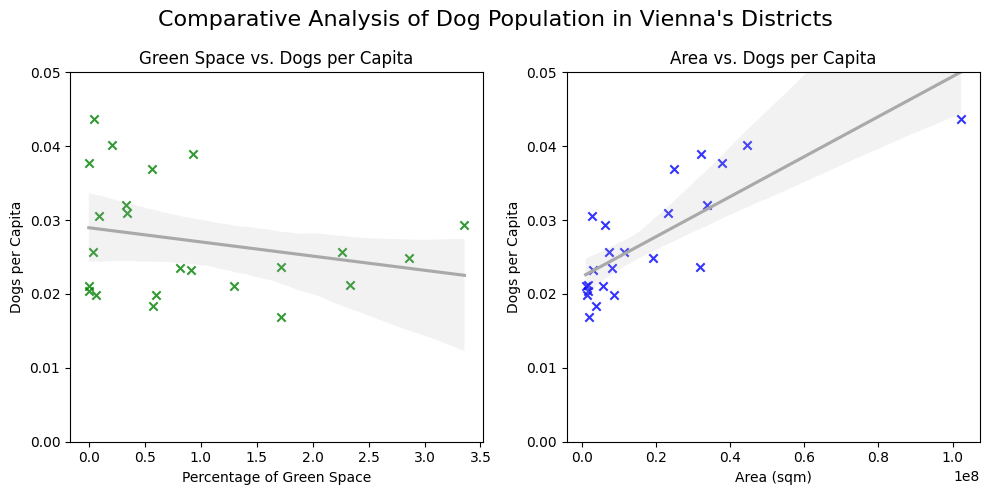

<Figure size 640x480 with 0 Axes>

In [77]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

#regplot for greenspace_pct vs dogs_per_capita
sns.regplot(data=df_h5, x="greenspace_pct", y="dogs_per_capita", marker="x", 
            scatter_kws=dict(color="g"), line_kws=dict(color="darkgray"), ax=axs[0])
axs[0].set_xlabel("Percentage of Green Space")
axs[0].set_ylabel("Dogs per Capita")
axs[0].set_title("Green Space vs. Dogs per Capita")
axs[0].set_ylim([0, 0.05])

# regplot for area vs dogs_per_capita
sns.regplot(data=df_h5, x="area", y="dogs_per_capita", marker="x", scatter_kws=dict(color="b"), 
            line_kws=dict(color="darkgray"), ax=axs[1])
axs[1].set_xlabel("Area (sqm)")
axs[1].set_ylabel("Dogs per Capita")
axs[1].set_title("Area vs. Dogs per Capita")
axs[1].set_ylim([0, 0.05])


plt.suptitle("Comparative Analysis of Dog Population in Vienna's Districts", fontsize=16)
fig.align_ylabels(axs[:])
plt.tight_layout()
plt.show()
plt.savefig("H5.png")

When creating a scatter plot and fitting a linear model to the data, we found that our initial hypothesis - that the percentage of green space is indicative of a higher dog population - was not supported. The scatter plot does not show strong correlation, and even if correlation was assumed, it would be slightly negative. Consequently, our hypothesis was not validated. 

When examining another variable, the area of each district, we saw a positive correlation. 
It appears that the size of a district may be a more reliable predictor of the dog population per inhabitant.


In [62]:
df_h5[["dogs_per_capita", "greenspace_pct"]].corr(method='pearson')

,dogs_per_capita,greenspace_pct
dogs_per_capita,1.000000,-0.246081
greenspace_pct,-0.246081,1.000000


In [80]:
df_h5[["dogs_per_capita", "area"]].corr(method='kendall')

,dogs_per_capita,area
dogs_per_capita,1.000000,0.620553
area,0.620553,1.000000


# END FORMULATE HYPOTHESIS H5

# STATISTICAL TESTING???

In [64]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df_h5['area'], df_h5['dogs_per_capita'])

In [65]:
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7972594953108546
P-value: 5.249056418481239e-06


In [66]:
p_value<0.05

True